In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set pandas to display all columns
pd.set_option('display.max_columns', None)

In [2]:
# cleaned data (no additional shit done)
df_imputed = pd.read_csv('new_222_data_train_imputed.csv')
df_imputed_test = pd.read_csv('new_222_data_test_imputed.csv')
# cleaned, imputed, normalized, and decorrelated data
df_norm_decorr = pd.read_csv('new_222_data_train_norm_decorr.csv')
df_norm_decorr_test = pd.read_csv('new_222_data_test_norm_decorr.csv')

In [3]:
original_feature_list = df_imputed.columns.tolist()
decorred_feature_list = df_norm_decorr.columns.tolist()
intersec_feature_list = list(set(original_feature_list) & set(decorred_feature_list))
decorred_uniques_list = list(set(decorred_feature_list) - set(original_feature_list))

In [4]:
df_imputed_decorr_1 = df_imputed[intersec_feature_list]
df_imputed_decorr_2 = df_norm_decorr[decorred_uniques_list]
df_imputed_decorr = pd.concat([df_imputed_decorr_1, df_imputed_decorr_2], axis=1)
df_imputed_decorr = df_imputed_decorr[[c for c in df_imputed_decorr if c not in ['population_2020','microbusiness_density']] + ['population_2020','microbusiness_density']]

df_imputed_decorr_1_test = df_imputed_test[intersec_feature_list]
df_imputed_decorr_2_test = df_norm_decorr_test[decorred_uniques_list]
df_imputed_decorr_test = pd.concat([df_imputed_decorr_1_test, df_imputed_decorr_2_test], axis=1)
df_imputed_decorr_test = df_imputed_decorr_test[[c for c in df_imputed_decorr_test if c not in ['population_2020','microbusiness_density']] + ['population_2020','microbusiness_density']]

In [5]:
df_imputed_decorr['population_2020'] = df_imputed['pop_2020']
df_imputed_decorr_test['population_2020'] = df_imputed_test['pop_2020']

In [6]:
df_imputed_decorr.sample(3)

,"Remaining_Tax_Burden(per $1,000 of personal income)",prev_year_social_associations,Tax_Expenditure_Limits,prev_year_primary_care_physicians,GPT_OH_Low_Cost_of_Living,prev_yr_rent_50_2,GPT_OH_Tough_Labor_Market,Top_Marginal_Personal_Income_Tax_Rate,Recently_Legislated_Tax_Changes,GPT_PCA_dim5,Prev_Yr_Manu_Pct_GDP,GPT_OH_Unfavorable_Location,Prev_Yr_FinS_Pct_GDP,GPT_OH_Low_Pop_Bad_Weather,prev_year_driving_alone_to_work,GPT_PCA_dim4,Prev_Yr_Retl_Pct_GDP,Prev_Yr_Agri_Pct_GDP,prev_year_long_commute_driving_alone,prev_year_injury_deaths,GPT_OH_Government_Support,GPT_PCA_dim7,prev_year_air_pollution_particulate_matter,prev_year_mental_health_providers,two_yrs_prior_pct_it_workers,prev_year_dentists,GPT_PCA_dim0,GPT_PCA_dim1,prev_year_adult_obesity,Prev_Yr_EduS_Pct_GDP,Prev_Yr_Info_Pct_GDP,GPT_PCA_dim3,prev_year_alcohol_impaired_driving_deaths,pop_10yr_pct_chg,"State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",GPT_OH_Large_Customer_Base,Prev_Yr_Mine_Pct_GDP,GPT_OH_Limited_Financing,prev_year_severe_housing_problems,coastline_flag,Average Workers_Compensation_Costs_(per $100 of payroll),State_Minimum_Wage_(federal floor is $7.25),GPT_PCA_dim8,prev_year_drinking_water_violations,"Sales_Tax_Burden(per $1,000 of personal income)",GPT_PCA_dim2,"Property_Tax_Burden_(per $1,000 of personal income)",Prev_Yr_EntS_Pct_GDP,"Public_Employees_Per_10,000_of_Population_(full-time equivalent)",GPT_PCA_dim9,prev_year_access_to_exercise_opportunities,prev_year_uninsured,Prev_Yr_Gvmt_Pct_GDP,Estate_Inheritance_Tax_Levied_Flag,Debt_Service_as_a_Share_of_Tax_Revenue,prev_year_violent_crime,prev_year_flu_vaccinations,prev_year_preventable_hospital_stays,GPT_OH_Limited_Tech_n_Infra,GPT_PCA_dim6,prev_year_diabetes_monitoring,GPT_OH_Supportive_Community,GPT_OH_Natural_Resources,Prev_Yr_GoTr_Pct_GDP,GPT_OH_Various_Downsides,health_social_pca_0,health_social_pca_2,gpt_ae_pca_1,health_social_pca_4,gpt_ae_pca_0,health_social_pca_1,health_social_pca_5,gpt_ae_pca_2,health_social_pca_3,population_2020,microbusiness_density
2364,12.39,7.0,0.0,2530.0,1.0,1284.0,0.0,0.06,-0.66,0.060237,25.10,0.0,14.63,0.0,0.82,0.439188,6.35,0.33,0.44,77.0,0.0,-0.459551,10.4,860.0,1.9,2910.0,-0.718785,-0.432729,0.29,4.73,0.89,0.073551,0.13,9.381154,66.1,1.0,0.00,1.0,0.15,0.0,1.64,7.25,-0.107628,0.0,20.47,-0.227192,27.04,3.32,491.9,-0.177080,0.67,0.17,7.47,0.0,0.06,468.0,0.51,6120.0,1.0,0.64679,0.880,1.0,0.0,0.00,1.0,0.090343,0.817319,0.961492,-0.638787,1.489740,-0.455192,-0.277940,-0.672469,-0.012565,109426.0,4.646638
1691,19.71,6.7,0.0,1710.0,1.0,720.0,1.0,0.07,0.07,0.098479,2.44,0.0,13.04,0.0,0.88,-0.270011,8.31,0.64,0.31,118.0,0.0,-0.355158,9.2,40.0,2.5,1480.0,0.018793,-0.262005,0.41,17.77,10.95,-0.253033,0.10,-12.418301,66.5,1.0,4.15,1.0,0.16,0.0,1.13,7.25,-0.200212,1.0,20.73,1.243609,20.28,1.72,543.0,-0.107270,0.48,0.07,12.89,1.0,0.07,52.0,0.34,10771.0,1.0,0.21357,0.820,1.0,0.0,8.16,0.0,7.665825,0.602252,0.596263,0.443624,3.190345,0.035570,-1.159370,0.034708,-0.989077,34974.0,1.473609
1566,15.26,13.9,2.0,1800.0,1.0,822.0,1.0,0.00,0.00,-0.479316,11.10,1.0,8.77,0.0,0.83,0.114498,3.99,42.66,0.15,98.0,0.0,-0.109168,5.4,2430.0,0.5,3640.0,1.909753,0.251189,0.28,0.00,2.75,-0.288391,0.09,7.828021,67.1,1.0,0.00,0.0,0.10,0.0,0.98,7.25,0.496007,1.0,28.08,-0.043570,40.10,1.40,528.9,-0.225291,0.93,0.30,2.53,0.0,0.09,641.0,0.28,5676.0,0.0,-0.27103,0.832,0.0,0.0,0.00,0.0,1.006494,3.438451,-0.182165,-1.117470,1.336867,-2.589071,0.353567,0.749631,2.277705,7273.0,2.895808


In [7]:
df_imputed_decorr_test.sample(3)

,"Remaining_Tax_Burden(per $1,000 of personal income)",prev_year_social_associations,Tax_Expenditure_Limits,prev_year_primary_care_physicians,GPT_OH_Low_Cost_of_Living,prev_yr_rent_50_2,GPT_OH_Tough_Labor_Market,Top_Marginal_Personal_Income_Tax_Rate,Recently_Legislated_Tax_Changes,GPT_PCA_dim5,Prev_Yr_Manu_Pct_GDP,GPT_OH_Unfavorable_Location,Prev_Yr_FinS_Pct_GDP,GPT_OH_Low_Pop_Bad_Weather,prev_year_driving_alone_to_work,GPT_PCA_dim4,Prev_Yr_Retl_Pct_GDP,Prev_Yr_Agri_Pct_GDP,prev_year_long_commute_driving_alone,prev_year_injury_deaths,GPT_OH_Government_Support,GPT_PCA_dim7,prev_year_air_pollution_particulate_matter,prev_year_mental_health_providers,two_yrs_prior_pct_it_workers,prev_year_dentists,GPT_PCA_dim0,GPT_PCA_dim1,prev_year_adult_obesity,Prev_Yr_EduS_Pct_GDP,Prev_Yr_Info_Pct_GDP,GPT_PCA_dim3,prev_year_alcohol_impaired_driving_deaths,pop_10yr_pct_chg,"State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",GPT_OH_Large_Customer_Base,Prev_Yr_Mine_Pct_GDP,GPT_OH_Limited_Financing,prev_year_severe_housing_problems,coastline_flag,Average Workers_Compensation_Costs_(per $100 of payroll),State_Minimum_Wage_(federal floor is $7.25),GPT_PCA_dim8,prev_year_drinking_water_violations,"Sales_Tax_Burden(per $1,000 of personal income)",GPT_PCA_dim2,"Property_Tax_Burden_(per $1,000 of personal income)",Prev_Yr_EntS_Pct_GDP,"Public_Employees_Per_10,000_of_Population_(full-time equivalent)",GPT_PCA_dim9,prev_year_access_to_exercise_opportunities,prev_year_uninsured,Prev_Yr_Gvmt_Pct_GDP,Estate_Inheritance_Tax_Levied_Flag,Debt_Service_as_a_Share_of_Tax_Revenue,prev_year_violent_crime,prev_year_flu_vaccinations,prev_year_preventable_hospital_stays,GPT_OH_Limited_Tech_n_Infra,GPT_PCA_dim6,prev_year_diabetes_monitoring,GPT_OH_Supportive_Community,GPT_OH_Natural_Resources,Prev_Yr_GoTr_Pct_GDP,GPT_OH_Various_Downsides,health_social_pca_0,health_social_pca_2,gpt_ae_pca_1,health_social_pca_4,gpt_ae_pca_0,health_social_pca_1,health_social_pca_5,gpt_ae_pca_2,health_social_pca_3,population_2020,microbusiness_density
605,15.86,11.5,1.0,1950.0,1.0,778.0,1.0,0.05,-2.38,-0.057657,25.31,0.0,16.57,0.0,0.84,-0.091696,9.06,2.78,0.34,106.0,1.0,0.230778,8.2,640.0,1.3,2780.0,-0.474568,-0.803143,0.42,7.67,1.03,0.413770,0.37,-9.172847,70.9,1.0,0.00,1.0,0.19,0.0,1.31,7.25,-0.079830,0.0,24.18,-0.231211,22.46,4.56,530.0,-0.210654,0.54,0.13,16.95,0.0,0.05,461.0,0.48,5706.0,0.0,-0.017723,0.91,0.0,0.0,5.86,1.0,5.729276,-1.339288,-0.124905,-0.733158,0.111619,1.721482,1.127386,0.479432,0.079198,49479.0,1.936811
254,18.51,11.5,0.0,1240.0,1.0,860.0,0.0,0.05,-2.21,-0.279959,33.87,0.0,15.80,1.0,0.83,-0.502372,4.84,2.25,0.11,63.0,0.0,0.036746,8.5,620.0,1.9,1280.0,-1.605280,1.290371,0.37,10.22,3.37,-0.572271,0.16,3.893200,70.6,0.0,0.04,1.0,0.11,0.0,1.54,7.25,-0.513405,0.0,23.71,0.025395,35.41,3.26,601.4,-0.189172,0.85,0.04,5.13,1.0,0.04,210.0,0.58,8826.0,0.0,0.175065,0.93,1.0,1.0,2.84,0.0,-5.056031,-1.765240,0.678661,-0.425446,0.232683,0.098051,1.010859,-1.296411,0.565883,97590.0,4.301651
371,18.22,7.5,2.0,2080.0,1.0,1099.0,1.0,0.00,-0.19,0.034140,10.89,1.0,19.31,0.0,0.83,0.832768,7.17,0.76,0.40,78.0,1.0,0.220167,6.1,1070.0,1.3,2930.0,0.158402,0.076254,0.37,9.24,1.62,0.751423,0.25,23.450264,62.3,1.0,1.11,0.0,0.17,0.0,1.41,10.00,0.203855,1.0,27.68,-0.662444,27.96,2.92,415.9,-0.262758,0.79,0.15,7.24,0.0,0.05,341.0,0.46,6344.0,0.0,0.543123,0.86,0.0,0.0,9.97,1.0,0.881340,-0.131196,-0.347421,-0.588300,-3.202180,-0.091210,0.260495,-0.537443,-0.327219,744552.0,5.189622


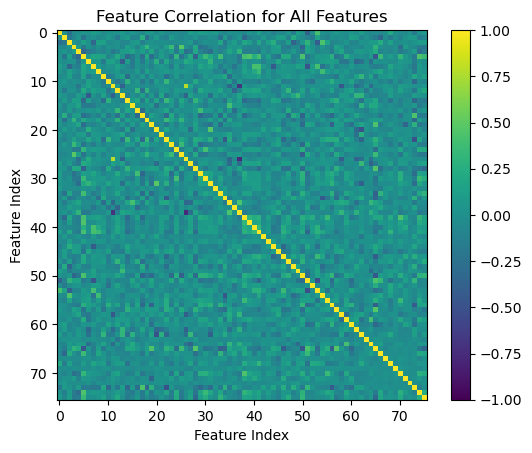

In [8]:
corr = df_imputed_decorr.corr()
corr_feat_mtx = corr.to_numpy()
plt.figure()
plt.imshow(corr_feat_mtx, interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.title('Feature Correlation for All Features')
plt.show()

In [9]:
# number of 0s in microbusiness_density
print('Number of 0s in microbusiness_density: ', len(df_imputed_decorr[df_imputed_decorr['microbusiness_density'] == 0]))

Number of 0s in microbusiness_density:  0


In [10]:
# save the data
df_imputed_decorr.to_csv('new_222_data_train_decorr.csv', index=False)
df_imputed_decorr_test.to_csv('new_222_data_test_decorr.csv', index=False)

In [11]:
# print out all features
print(df_imputed_decorr.columns.tolist())

['Remaining_Tax_Burden(per $1,000 of personal income)', 'prev_year_social_associations', 'Tax_Expenditure_Limits', 'prev_year_primary_care_physicians', 'GPT_OH_Low_Cost_of_Living', 'prev_yr_rent_50_2', 'GPT_OH_Tough_Labor_Market', 'Top_Marginal_Personal_Income_Tax_Rate', 'Recently_Legislated_Tax_Changes', 'GPT_PCA_dim5', 'Prev_Yr_Manu_Pct_GDP', 'GPT_OH_Unfavorable_Location', 'Prev_Yr_FinS_Pct_GDP', 'GPT_OH_Low_Pop_Bad_Weather', 'prev_year_driving_alone_to_work', 'GPT_PCA_dim4', 'Prev_Yr_Retl_Pct_GDP', 'Prev_Yr_Agri_Pct_GDP', 'prev_year_long_commute_driving_alone', 'prev_year_injury_deaths', 'GPT_OH_Government_Support', 'GPT_PCA_dim7', 'prev_year_air_pollution_particulate_matter', 'prev_year_mental_health_providers', 'two_yrs_prior_pct_it_workers', 'prev_year_dentists', 'GPT_PCA_dim0', 'GPT_PCA_dim1', 'prev_year_adult_obesity', 'Prev_Yr_EduS_Pct_GDP', 'Prev_Yr_Info_Pct_GDP', 'GPT_PCA_dim3', 'prev_year_alcohol_impaired_driving_deaths', 'pop_10yr_pct_chg', 'State_Liability_System_Survey_(

In [12]:
# kNN imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=8)
# fit on the dataset
imputer.fit(df_imputed_decorr)
# transform the dataset
df_imputed_knn = imputer.transform(df_imputed_decorr)
df_imputed_knn_test = imputer.transform(df_imputed_decorr_test)

# convert back to dataframe
df_imputed_knn = pd.DataFrame(df_imputed_knn, columns=df_imputed_decorr.columns.tolist())
df_imputed_knn_test = pd.DataFrame(df_imputed_knn_test, columns=df_imputed_decorr_test.columns.tolist())

In [13]:
# sort the columns alphabetically except for the last two columns, which are population_2020 and microbusiness_density
df_imputed_knn_re = df_imputed_knn.reindex(sorted(df_imputed_knn.columns.tolist()[:-2]), axis=1)
df_imputed_knn_re['population_2020'] = df_imputed_knn['population_2020']
df_imputed_knn_re['microbusiness_density'] = df_imputed_knn['microbusiness_density']

df_imputed_knn_re_test = df_imputed_knn_test.reindex(sorted(df_imputed_knn_test.columns.tolist()[:-2]), axis=1)
df_imputed_knn_re_test['population_2020'] = df_imputed_knn_test['population_2020']
df_imputed_knn_re_test['microbusiness_density'] = df_imputed_knn_test['microbusiness_density']

In [14]:
# save the data
df_imputed_knn_re.to_csv('new_222_data_train_decorr_imputed.csv', index=False)
df_imputed_knn_re_test.to_csv('new_222_data_test_decorr_imputed.csv', index=False)

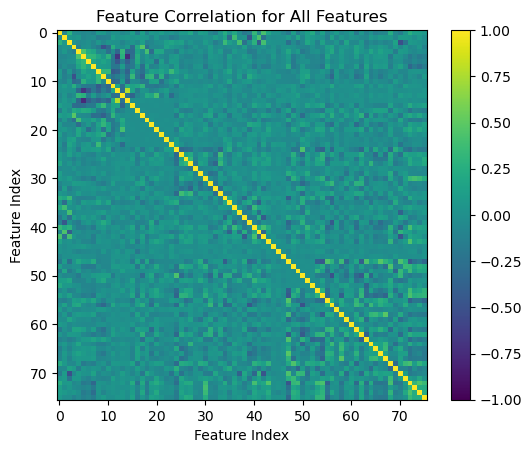

In [15]:
corr = df_imputed_knn_re.corr()
corr_feat_mtx = corr.to_numpy()
plt.figure()
plt.imshow(corr_feat_mtx, interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.title('Feature Correlation for All Features')
plt.show()

### Models that are based on the assumption of a normal distribution or linear relationship between the predictor variables and the response variable can be sensitive to highly skewed covariates.

Linear regression is one such example. In linear regression, the model assumes that the predictor variables have a linear relationship with the response variable and that the residuals are normally distributed. When the predictor variables are highly skewed, the linear relationship may not hold, and the model may not accurately capture the relationship between the variables.

Another example is logistic regression, which assumes that the log odds of the response variable are linearly related to the predictor variables. If the predictor variables are highly skewed, the log odds may not be linearly related to the predictor variables, and the model may not perform well.

Other models that may be sensitive to highly skewed covariates include discriminant analysis, principal component regression, and ridge regression.

To address the issue of highly skewed covariates, you can transform the variables using methods such as the logarithmic transformation, the square root transformation, or the Box-Cox transformation. Alternatively, you can consider using non-parametric models that do not make assumptions about the distribution of the data, such as decision trees, random forests, or support vector machines.

### Highly skewed features can have several impacts on a linear regression model:

1. Outliers: Skewed features can lead to outliers in the dataset, which can have a significant impact on the linear regression model. Outliers can heavily influence the slope and intercept of the linear regression line and, consequently, reduce the model's predictive accuracy.

2. Non-normality of residuals: Skewed features can also lead to non-normality of the residuals, which is a key assumption of linear regression models. Violation of this assumption can lead to biased estimates of the regression coefficients, making it difficult to interpret the results.

3. Model interpretation: Highly skewed features can make it difficult to interpret the coefficients of the linear regression model. Since the effect of a variable on the dependent variable is not linear, it can be challenging to interpret the impact of a unit change in the independent variable on the dependent variable.

In [16]:
transforms = { "Prev_Yr_Agri_Pct_GDP": "LOG", "Prev_Yr_EduS_Pct_GDP": "LOG", "Prev_Yr_EntS_Pct_GDP": "LOG", 
              "Prev_Yr_FinS_Pct_GDP": "LOG", "Prev_Yr_GoTr_Pct_GDP": "LOG", "Prev_Yr_Gvmt_Pct_GDP": "LOG", 
              "Prev_Yr_Info_Pct_GDP": "LOG", "Prev_Yr_Manu_Pct_GDP": "LOG", "Prev_Yr_Mine_Pct_GDP": "LOG", 
              "Prev_Yr_Retl_Pct_GDP": "LOG", "population_2020": "LOG", 
              "prev_year_injury_deaths": "LOG", "prev_year_mental_health_providers": "LOG",  
              "prev_year_preventable_hospital_stays": "LOG", "prev_year_dentists": "LOG",
              "prev_year_primary_care_physicians": "LOG", "prev_year_severe_housing_problems": "LOG",
                "prev_year_violent_crime": "LOG", "prev_yr_rent_50_2": "LOG", "two_yrs_prior_pct_it_workers": "LOG"}

In [17]:
# transform the data
df_imputed_knn_re_transformed = df_imputed_knn_re.copy()
df_imputed_knn_re_transformed_test = df_imputed_knn_re_test.copy()

for col in df_imputed_knn_re_transformed.columns.tolist():
    if col in transforms.keys():
        if transforms[col] == "LOG":
            df_imputed_knn_re_transformed[col] = np.log(df_imputed_knn_re_transformed[col] + 1)
            df_imputed_knn_re_transformed_test[col] = np.log(df_imputed_knn_re_transformed_test[col] + 1)

df_imputed_knn_re_transformed.head(3)

,Average Workers_Compensation_Costs_(per $100 of payroll),Debt_Service_as_a_Share_of_Tax_Revenue,Estate_Inheritance_Tax_Levied_Flag,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Cost_of_Living,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,Prev_Yr_Agri_Pct_GDP,Prev_Yr_EduS_Pct_GDP,Prev_Yr_EntS_Pct_GDP,Prev_Yr_FinS_Pct_GDP,Prev_Yr_GoTr_Pct_GDP,Prev_Yr_Gvmt_Pct_GDP,Prev_Yr_Info_Pct_GDP,Prev_Yr_Manu_Pct_GDP,Prev_Yr_Mine_Pct_GDP,Prev_Yr_Retl_Pct_GDP,"Property_Tax_Burden_(per $1,000 of personal income)","Public_Employees_Per_10,000_of_Population_(full-time equivalent)",Recently_Legislated_Tax_Changes,"Remaining_Tax_Burden(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Tax_Expenditure_Limits,Top_Marginal_Personal_Income_Tax_Rate,coastline_flag,gpt_ae_pca_0,gpt_ae_pca_1,gpt_ae_pca_2,health_social_pca_0,health_social_pca_1,health_social_pca_2,health_social_pca_3,health_social_pca_4,health_social_pca_5,pop_10yr_pct_chg,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_dentists,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_flu_vaccinations,prev_year_injury_deaths,prev_year_long_commute_driving_alone,prev_year_mental_health_providers,prev_year_preventable_hospital_stays,prev_year_primary_care_physicians,prev_year_severe_housing_problems,prev_year_social_associations,prev_year_uninsured,prev_year_violent_crime,prev_yr_rent_50_2,two_yrs_prior_pct_it_workers,population_2020,microbusiness_density
0,0.77,0.07,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.647401,-0.302502,0.986479,-0.505129,0.238995,0.173456,0.585643,-0.242382,0.012966,0.249955,2.449279,1.316408,1.178655,2.795450,0.000000,2.855895,0.000000,2.989714,0.131028,2.006871,23.69,488.0,-0.14,17.83,25.02,68.9,7.25,1.0,0.05,0.0,3.467616,-0.781044,-1.705426,1.358453,-1.983699,0.011464,-0.548534,-0.108535,-0.040512,-2.361248,0.34,0.35,8.7,0.21,8.639588,0.85,1.0,0.80,0.50,4.094345,0.45,7.433075,8.461046,8.350194,0.113329,14.8,0.12,4.174387,6.703188,0.741937,9.733411,1.194892
1,1.44,0.02,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.089446,-0.420084,-0.319809,-0.333071,0.621868,0.315584,-0.276524,0.066134,-0.143317,-0.345983,0.086178,0.000000,0.000000,2.756205,3.036874,2.293544,0.779325,2.085672,0.000000,2.060514,33.92,879.4,0.42,14.08,24.53,73.1,7.25,0.0,0.00,0.0,-1.863370,-0.062425,-1.345131,-1.349849,0.247309,0.560700,0.895130,-0.179182,-0.888099,7.072353,0.86,0.31,4.7,0.38,7.131699,0.83,1.0,0.85,0.46,4.644391,0.09,5.442418,8.408940,7.186144,0.104360,14.3,0.13,5.273000,6.776507,0.993252,11.299930,5.784670
2,2.16,0.07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.713000,0.442778,-0.319452,0.303061,-0.807856,0.288516,0.255465,0.201835,-0.420092,-0.194884,0.000000,1.601406,1.814825,3.085573,0.000000,2.144761,3.113515,1.184790,0.000000,1.280934,29.17,485.4,1.81,18.01,23.23,60.2,15.00,2.0,0.13,1.0,0.740315,-1.822976,-0.438074,-6.248364,3.981125,2.556537,-0.010411,0.828279,1.285225,7.583558,1.00,0.17,7.6,0.08,6.463029,0.84,0.0,0.32,0.40,4.143135,0.53,4.709530,7.980024,6.447306,0.215111,8.7,0.05,6.634633,8.216358,2.091864,13.672341,18.010631


In [18]:
# rename the columns
rename_dict = {}
for col in df_imputed_knn_re_transformed.columns.tolist():
    if col in transforms.keys():
        rename_dict[col] = col + '_log'
    else:
        rename_dict[col] = col

df_imputed_knn_re_transformed = df_imputed_knn_re_transformed.rename(columns=rename_dict)
df_imputed_knn_re_transformed_test = df_imputed_knn_re_transformed_test.rename(columns=rename_dict)
df_imputed_knn_re_transformed.head(3)

,Average Workers_Compensation_Costs_(per $100 of payroll),Debt_Service_as_a_Share_of_Tax_Revenue,Estate_Inheritance_Tax_Levied_Flag,GPT_OH_Government_Support,GPT_OH_Large_Customer_Base,GPT_OH_Limited_Financing,GPT_OH_Limited_Tech_n_Infra,GPT_OH_Low_Cost_of_Living,GPT_OH_Low_Pop_Bad_Weather,GPT_OH_Natural_Resources,GPT_OH_Supportive_Community,GPT_OH_Tough_Labor_Market,GPT_OH_Unfavorable_Location,GPT_OH_Various_Downsides,GPT_PCA_dim0,GPT_PCA_dim1,GPT_PCA_dim2,GPT_PCA_dim3,GPT_PCA_dim4,GPT_PCA_dim5,GPT_PCA_dim6,GPT_PCA_dim7,GPT_PCA_dim8,GPT_PCA_dim9,Prev_Yr_Agri_Pct_GDP_log,Prev_Yr_EduS_Pct_GDP_log,Prev_Yr_EntS_Pct_GDP_log,Prev_Yr_FinS_Pct_GDP_log,Prev_Yr_GoTr_Pct_GDP_log,Prev_Yr_Gvmt_Pct_GDP_log,Prev_Yr_Info_Pct_GDP_log,Prev_Yr_Manu_Pct_GDP_log,Prev_Yr_Mine_Pct_GDP_log,Prev_Yr_Retl_Pct_GDP_log,"Property_Tax_Burden_(per $1,000 of personal income)","Public_Employees_Per_10,000_of_Population_(full-time equivalent)",Recently_Legislated_Tax_Changes,"Remaining_Tax_Burden(per $1,000 of personal income)","Sales_Tax_Burden(per $1,000 of personal income)","State_Liability_System_Survey_(tort litigation treatment, judicial impartiality, etc.)",State_Minimum_Wage_(federal floor is $7.25),Tax_Expenditure_Limits,Top_Marginal_Personal_Income_Tax_Rate,coastline_flag,gpt_ae_pca_0,gpt_ae_pca_1,gpt_ae_pca_2,health_social_pca_0,health_social_pca_1,health_social_pca_2,health_social_pca_3,health_social_pca_4,health_social_pca_5,pop_10yr_pct_chg,prev_year_access_to_exercise_opportunities,prev_year_adult_obesity,prev_year_air_pollution_particulate_matter,prev_year_alcohol_impaired_driving_deaths,prev_year_dentists_log,prev_year_diabetes_monitoring,prev_year_drinking_water_violations,prev_year_driving_alone_to_work,prev_year_flu_vaccinations,prev_year_injury_deaths_log,prev_year_long_commute_driving_alone,prev_year_mental_health_providers_log,prev_year_preventable_hospital_stays_log,prev_year_primary_care_physicians_log,prev_year_severe_housing_problems_log,prev_year_social_associations,prev_year_uninsured,prev_year_violent_crime_log,prev_yr_rent_50_2_log,two_yrs_prior_pct_it_workers_log,population_2020_log,microbusiness_density
0,0.77,0.07,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.647401,-0.302502,0.986479,-0.505129,0.238995,0.173456,0.585643,-0.242382,0.012966,0.249955,2.449279,1.316408,1.178655,2.795450,0.000000,2.855895,0.000000,2.989714,0.131028,2.006871,23.69,488.0,-0.14,17.83,25.02,68.9,7.25,1.0,0.05,0.0,3.467616,-0.781044,-1.705426,1.358453,-1.983699,0.011464,-0.548534,-0.108535,-0.040512,-2.361248,0.34,0.35,8.7,0.21,8.639588,0.85,1.0,0.80,0.50,4.094345,0.45,7.433075,8.461046,8.350194,0.113329,14.8,0.12,4.174387,6.703188,0.741937,9.733411,1.194892
1,1.44,0.02,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.089446,-0.420084,-0.319809,-0.333071,0.621868,0.315584,-0.276524,0.066134,-0.143317,-0.345983,0.086178,0.000000,0.000000,2.756205,3.036874,2.293544,0.779325,2.085672,0.000000,2.060514,33.92,879.4,0.42,14.08,24.53,73.1,7.25,0.0,0.00,0.0,-1.863370,-0.062425,-1.345131,-1.349849,0.247309,0.560700,0.895130,-0.179182,-0.888099,7.072353,0.86,0.31,4.7,0.38,7.131699,0.83,1.0,0.85,0.46,4.644391,0.09,5.442418,8.408940,7.186144,0.104360,14.3,0.13,5.273000,6.776507,0.993252,11.299930,5.784670
2,2.16,0.07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.713000,0.442778,-0.319452,0.303061,-0.807856,0.288516,0.255465,0.201835,-0.420092,-0.194884,0.000000,1.601406,1.814825,3.085573,0.000000,2.144761,3.113515,1.184790,0.000000,1.280934,29.17,485.4,1.81,18.01,23.23,60.2,15.00,2.0,0.13,1.0,0.740315,-1.822976,-0.438074,-6.248364,3.981125,2.556537,-0.010411,0.828279,1.285225,7.583558,1.00,0.17,7.6,0.08,6.463029,0.84,0.0,0.32,0.40,4.143135,0.53,4.709530,7.980024,6.447306,0.215111,8.7,0.05,6.634633,8.216358,2.091864,13.672341,18.010631


In [19]:
# save the data
df_imputed_knn_re_transformed.to_csv('new_222_data_train_decorr_imputed_transformed.csv', index=False)
df_imputed_knn_re_transformed_test.to_csv('new_222_data_test_decorr_imputed_transformed.csv', index=False)

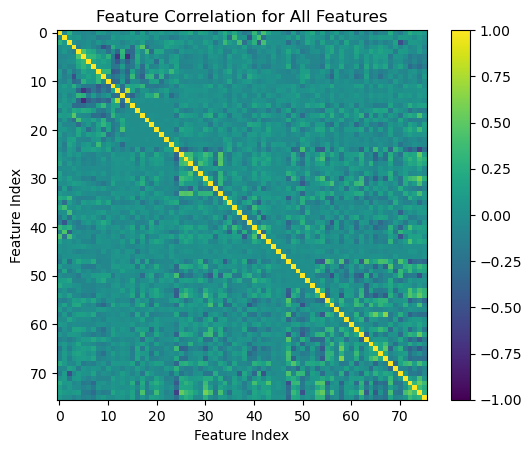

In [21]:
corr = df_imputed_knn_re_transformed.corr()
corr_feat_mtx = corr.to_numpy()
plt.figure()
plt.imshow(corr_feat_mtx, interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar()
plt.xlabel('Feature Index')
plt.ylabel('Feature Index')
plt.title('Feature Correlation for All Features')
plt.show()